In [2]:
import glob, os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [3]:
path = '../Results/Detection_fishcall/manual_csv_0.75'

In [4]:
alldf = pd.DataFrame()

for csvpath in glob.glob(f'{path}/202308/*_stats.csv'):
    print(csvpath)
    df = pd.read_csv(csvpath)
    df = df[df['keep']==True]
    alldf = pd.concat([alldf, df])

../Results/Detection_fishcall/manual_csv_0.75/202308/result_230830_stats.csv
../Results/Detection_fishcall/manual_csv_0.75/202308/result_230819_stats.csv
../Results/Detection_fishcall/manual_csv_0.75/202308/result_230818_stats.csv
../Results/Detection_fishcall/manual_csv_0.75/202308/result_230820_stats.csv


Text(6.999999999999998, 163.0, '2.78±1.35 kHz')

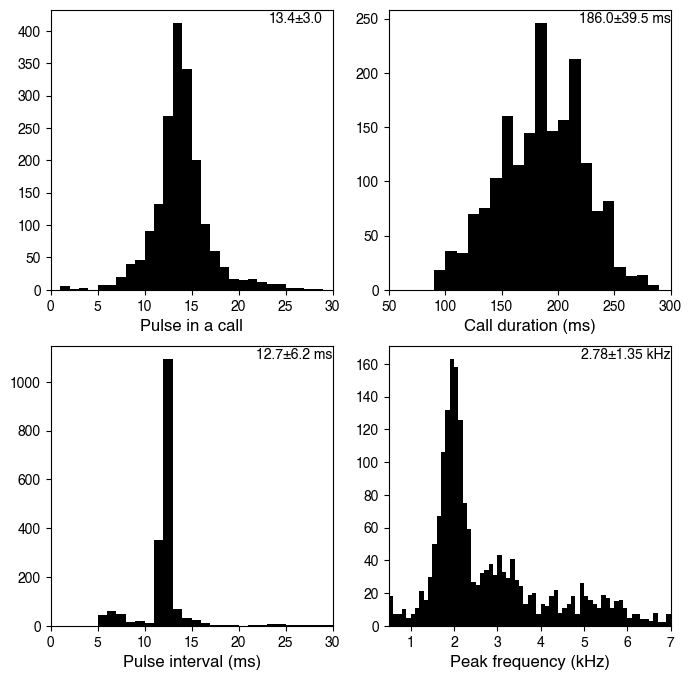

In [46]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
plt.rc('font', family='Helvetica')

bins = np.arange(50, 300+1, 10)
tmp = ax[0,1].hist(alldf['duration']*1000, bins=bins, color='k')
cnt=tmp[0]; interval=tmp[-1]
ax[0,1].set_xlim(50, 300)
ax[0,1].set_xlabel('Call duration (ms)', fontsize=12)
avg = round(np.mean(alldf['duration']*1000),1)
std = round(np.std(alldf['duration']*1000),1)
ax[0,1].text(x=bins[-1], y = max(cnt),s = f'{avg}±{std} ms', ha='right')

bins = np.arange(0, 30, 1)
tmp = ax[0,0].hist(alldf['pulse'], bins=bins, color='k')
cnt=tmp[0]; interval=tmp[-1]
ax[0,0].set_xlim(0, 30)
ax[0,0].set_xlabel('Pulse in a call', fontsize=12)
avg = round(np.mean(alldf['pulse']),1)
std = round(np.std(alldf['pulse']),1)
ax[0,0].text(x=bins[-1], y = max(cnt),s = f'{avg}±{std}', ha='right')

bins = np.arange(0, 30+1, 1)
tmp=ax[1,0].hist(alldf['pulse_interval']*1000, bins=bins, color='k')
cnt=tmp[0]; interval=tmp[-1]
ax[1,0].set_xlabel('Pulse interval (ms)', fontsize=12)
ax[1,0].set_xlim(0, 30)
avg = round(np.mean(alldf['pulse_interval']*1000),1)
std = round(np.std(alldf['pulse_interval']*1000),1)
ax[1,0].text(x=bins[-1], y = max(cnt),s = f'{avg}±{std} ms', ha='right')

bins = np.arange(0.5, 7+1, 0.1)
tmp= ax[1,1].hist(alldf['Peak_f']/1000, bins=bins, color='k')
cnt=tmp[0]; interval=tmp[-1]
ax[1,1].set_xlim(0.5,7)
ax[1,1].set_xlabel('Peak frequency (kHz)', fontsize=12)
ax[1,1].set_xticks(np.arange(1,7+1,1))
avg = round(np.mean(alldf['Peak_f']/1000),2)
std = round(np.std(alldf['Peak_f']/1000),2)
ax[1,1].text(x=bins[-10], y = max(cnt), s = f'{avg}±{std} kHz', ha='right')

# plt.savefig('../Results/Detection_fishcall/features_calls_202308.png',dpi=300, bbox_inches='tight')
# plt.savefig('../Results/Detection_fishcall/features_calls_202308.pdf',dpi=300, bbox_inches='tight')

In [47]:
y_hist

NameError: name 'y_hist' is not defined

In [5]:
n = len(bins)-1
interval = list(tmp[1])
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(interval[ii+1]+interval[ii])/2
    
y_hist=cnt

NameError: name 'bins' is not defined

/var/folders/07/_m900g1931d1pc5dgv3v4qpw0000gn/T/ipykernel_99325/3996206929.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


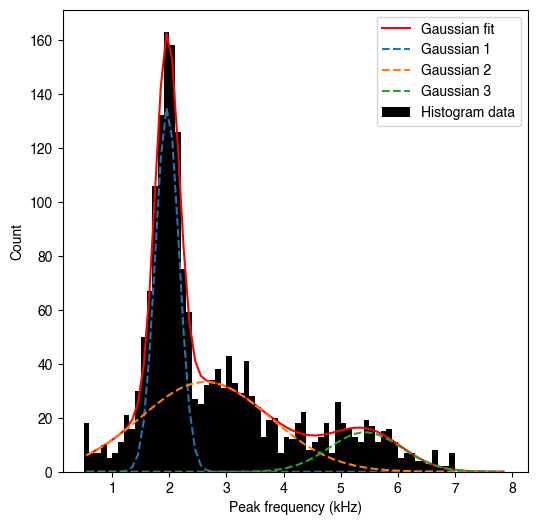

Gaussian 1: Amplitude = 134.93744791675428, Mean = 1.9626880580493131, Stddev = 0.2067976603955293
Gaussian 2: Amplitude = 33.24670047717481, Mean = 2.6282786870851766, Stddev = 1.130905757993286
Gaussian 3: Amplitude = 14.614791846004023, Mean = 5.431597903123532, Stddev = 0.635531711659702


In [50]:
def gaussian(X,C,X_mean,sigma):
    return C*exp(-(X-X_mean)**2/(2*sigma**2))

def multi_gaussian(x, *params):
    n_gaussians = len(params) // 3
    result = np.zeros_like(x)
    for i in range(n_gaussians):
        amp = params[i * 3]
        mean = params[i * 3+ 1]
        stddev = params[i * 3 + 2]
        result += gaussian(x, amp, mean, stddev)
    return result

# 初始猜测参数（你可以调整这些参数以获得更好的拟合）
initial_guess = [100, 2, 0.5, 50, 3, 1, 20, 5, 0.5]

# 拟合数据
params, covariance = curve_fit(multi_gaussian, x_hist, y_hist, p0=initial_guess)

# 计算拟合值
fitted_values = multi_gaussian(x_hist, *params)
# 计算每个高斯分布的值
gaussians = []
n_gaussians = len(params) // 3
for i in range(n_gaussians):
    amp = params[i * 3]
    mean = params[i * 3 + 1]
    stddev = params[i * 3 + 2]
    gaussians.append(gaussian(x_hist, amp, mean, stddev))

# 绘制结果
plt.figure(figsize=(6, 6))
plt.bar(x_hist, y_hist, width=0.1, label='Histogram data',color='k')
plt.plot(x_hist, fitted_values, color='red', label='Gaussian fit')

# 标记每个高斯分布的峰值
for i in range(n_gaussians):
    plt.plot(x_hist, gaussians[i], linestyle='--', label=f'Gaussian {i+1}')
    # plt.axvline(params[i * 3 + 1], color='green', linestyle='--')
    # plt.text(params[i * 3 + 1], max(gaussians[i]), f'Peak {i+1}\n({params[i * 3 + 1]:.2f}, {max(gaussians[i]):.2f})', 
             # horizontalalignment='center', verticalalignment='bottom')

plt.xlabel('Peak frequency (kHz)')
plt.ylabel('Count')
plt.legend()
plt.show()

# 打印每个高斯分布的峰值
for i in range(n_gaussians):
    amp = params[i * 3]
    mean = params[i * 3 + 1]
    stddev = params[i * 3 + 2]
    print(f'Gaussian {i+1}: Amplitude = {amp}, Mean = {mean}, Stddev = {stddev}')

In [31]:
params, covariance

(array([142.44418139,   1.83204289,   0.26720925,  38.88698788,
          2.99417732,   0.35413393,  18.61846514,   4.79003667,
          1.06365282]),
 array([[ 1.24180325e+01, -1.29503355e-03, -1.64511244e-02,
          1.64371972e+00, -2.16622004e-03,  2.47618987e-02,
          4.29254135e-01,  9.24263745e-02, -1.15045251e-01],
        [-1.29503355e-03,  6.71660476e-05,  1.36661849e-05,
          2.70777640e-03,  5.86109954e-05, -1.23285439e-04,
          5.04454550e-04, -1.01251844e-04,  4.60436143e-05],
        [-1.64511244e-02,  1.36661849e-05,  7.26664555e-05,
          2.78836329e-03,  8.21075763e-05, -1.38761477e-04,
          6.47126621e-04, -9.53678585e-05,  2.83172279e-05],
        [ 1.64371972e+00,  2.70777640e-03,  2.78836329e-03,
          1.65544625e+01,  4.27783122e-02,  9.03489044e-03,
          1.83962012e+00,  4.18999471e-01, -4.99244384e-01],
        [-2.16622004e-03,  5.86109954e-05,  8.21075763e-05,
          4.27783122e-02,  1.36375137e-03,  1.87421545e-04,
    

In [5]:
plt.plot(np.arangw)

2      123.357240
3      123.348927
4      123.859530
5      124.629272
6      124.116756
          ...    
282    124.422930
283    124.025137
284    125.235417
285    124.737439
286    124.371016
Name: SPLrms, Length: 1858, dtype: float64

Text(149, 11.0, '122.7±2.4 ms')

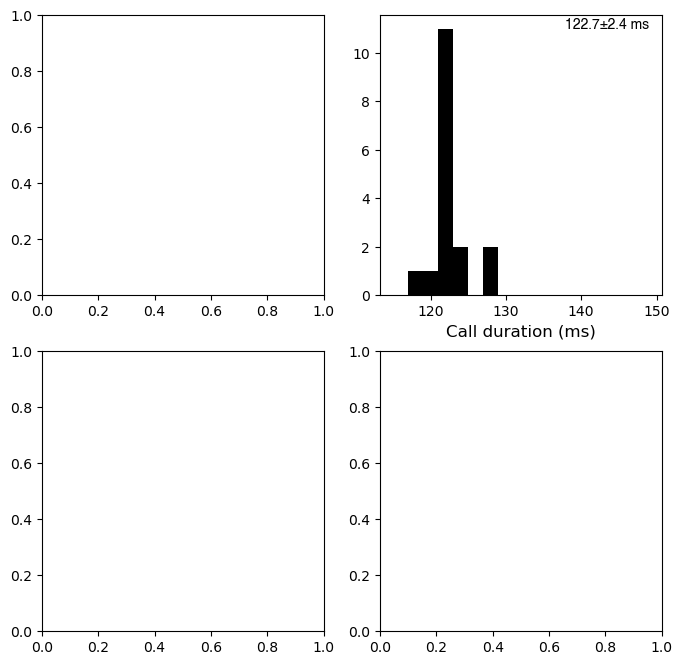

In [6]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
plt.rc('font', family='Helvetica')


bins = np.arange(115, 150+1, 2)
tmp = ax[0,1].hist(alldf['SPLrms'], bins=bins, color='k')
cnt=tmp[0]; interval=tmp[-1]
ax[0,1].set_xlabel('Call duration (ms)', fontsize=12)
avg = round(np.mean(alldf['SPLrms']), 1)
std = round(np.std(alldf['SPLrms']), 1)
ax[0,1].text(x=bins[-1], y = max(cnt),s = f'{avg}±{std} ms', ha='right')

In [52]:
alldf

,Unnamed: 0,time_min_offset,time_max_offset,frequency_min,frequency_max,duration,time_min_date,time_max_date,SPLpp,peaks,low_freq,SNR,coeff,keep,pulse,pulse_interval,call_duration,Peak_f,SPLrms
2,2,5.276583,5.461053,1215,2412,0.18447,"UTCDateTime(2023, 6, 18, 19, 26, 57, 276583","UTCDateTime(2023, 6, 18, 19, 26, 57, 461053",143.077815,13,NaN,2.268955,0.821924,True,15.0,0.012375,0.172563,1920.0,123.357240
3,3,6.220383,6.379113,963,2265,0.15873,"UTCDateTime(2023, 6, 18, 19, 27, 8, 220383","UTCDateTime(2023, 6, 18, 19, 27, 8, 379113",146.680275,9,NaN,2.541260,0.888497,True,3.0,0.064437,0.077240,2080.0,123.348927
4,4,6.186063,6.293313,654,1680,0.10725,"UTCDateTime(2023, 6, 18, 19, 28, 48, 186063","UTCDateTime(2023, 6, 18, 19, 28, 48, 293313",141.633471,7,NaN,2.448086,0.886449,True,16.0,0.005219,0.100271,894.0,123.859530
5,5,5.079243,5.255133,501,2901,0.17589,"UTCDateTime(2023, 6, 18, 19, 29, 7, 79243","UTCDateTime(2023, 6, 18, 19, 29, 7, 255133",143.554809,8,NaN,3.428789,0.872400,True,24.0,0.005635,0.163135,1740.0,124.629272
6,6,1.321203,1.578603,501,3687,0.25740,"UTCDateTime(2023, 6, 18, 19, 29, 13, 321203","UTCDateTime(2023, 6, 18, 19, 29, 13, 578603",146.002628,8,NaN,3.053487,0.800090,True,13.0,0.005802,0.215385,2346.0,124.116756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,5.340933,5.542563,918,2220,0.20163,"UTCDateTime(2023, 6, 23, 21, 38, 38, 340933","UTCDateTime(2023, 6, 23, 21, 38, 38, 542563",146.196052,6,NaN,3.416955,0.814828,True,14.0,0.012604,0.158802,1590.0,124.422930
283,283,9.000303,9.193353,912,2328,0.19305,"UTCDateTime(2023, 6, 23, 21, 38, 42, 303)","UTCDateTime(2023, 6, 23, 21, 38, 42, 193353)",144.129077,12,NaN,3.025629,0.857611,True,15.0,0.012604,0.167781,1104.0,124.025137
284,284,2.376543,2.608203,501,4743,0.23166,"UTCDateTime(2023, 6, 23, 21, 38, 45, 376543","UTCDateTime(2023, 6, 23, 21, 38, 45, 608203",148.264893,14,NaN,4.502397,0.819002,True,16.0,0.022969,0.181740,1508.0,125.235417
285,285,7.850583,8.090823,501,2484,0.24024,"UTCDateTime(2023, 6, 23, 21, 38, 50, 850583","UTCDateTime(2023, 6, 23, 21, 38, 51, 90823",146.296477,15,NaN,4.088347,0.838029,True,15.0,0.012719,0.172271,1512.0,124.737439


In [7]:
cleardf = {'time':[], 'SPLrms':alldf['SPLrms']}

for i in range(len(alldf)):
    begintmp = re.split('[(|)|,]',alldf['time_min_date'].values[i]); endtmp = re.split('[(|)|,]',alldf['time_max_date'].values[i])
    tr_begin = datetime(int(begintmp[1]),int(begintmp[2]),int(begintmp[3]),int(begintmp[4]),int(begintmp[5]),int(begintmp[6]),int(begintmp[7]))
    tr_end = datetime(int(endtmp[1]),int(endtmp[2]),int(endtmp[3]),int(endtmp[4]),int(endtmp[5]),int(endtmp[6]),int(endtmp[7]))  
    cleardf['time'].append(tr_begin)
    
cleardf = pd.DataFrame(cleardf)

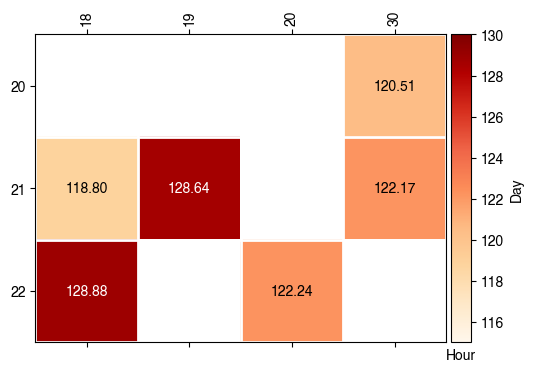

In [8]:
# 解析时间戳
from mpl_toolkits.axes_grid1 import make_axes_locatable
cleardf['date'] = cleardf['time'].dt.date
cleardf['hour'] = cleardf['time'].dt.hour

# 构建用于热力图的透视表
heatmap_data = cleardf.pivot_table(columns='date', index='hour', values='SPLrms', aggfunc='mean')#.fillna()

# 转换成 numpy array 以便于绘图
heatmap_matrix = heatmap_data.to_numpy()

# 绘制热力图
fig, ax = plt.subplots(figsize=(8, 4))
cax = ax.matshow(heatmap_matrix, cmap='OrRd',vmin=115, vmax=130)

# 创建可调整颜色条的位置
divider = make_axes_locatable(ax)
cax_colorbar = divider.append_axes("right", size="5%", pad=0.05)

# 添加颜色条
cbar = fig.colorbar(cax, cax=cax_colorbar)

# 设置 x 轴 和 y 轴 的刻度和标签
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)
ax.set_xticklabels([date.day for date in heatmap_data.columns], rotation=90)

# 设置标签
plt.xlabel('Hour')
plt.ylabel('Day')
# plt.title('Heatmap of SPLrms by Hour and Date')

# # 显示数值
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if not np.isnan(heatmap_matrix[i, j]):
            if heatmap_matrix[i, j]> 128:
                ax.text(j, i, f"{heatmap_matrix[i, j]:.2f}", ha='center', va='center', color='white')
            else:
                ax.text(j, i, f"{heatmap_matrix[i, j]:.2f}", ha='center', va='center', color='black')

# 添加网格线
ax.set_xticks(np.arange(-0.5, len(heatmap_data.columns), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(heatmap_data.index), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
ax.tick_params(which='minor', size=0)

plt.show()

In [ ]:
set(cleardf['date'])

{datetime.date(2023, 6, 18),
 datetime.date(2023, 6, 19),
 datetime.date(2023, 6, 20),
 datetime.date(2023, 6, 21),
 datetime.date(2023, 6, 22),
 datetime.date(2023, 6, 23)}